In [53]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [54]:
data=pd.read_excel('Data_Train.xlsx')
pd.set_option('display.max_columns',None)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [55]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [56]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [57]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [58]:
data['Date_of_Journey'][0].split('/')

['24', '03', '2019']

In [59]:
data['day'],data['month'],data['year']=data['Date_of_Journey'].str.split('/',3).str
data['day'],data['month'],data['year']=data['day'].astype(int),data['month'].astype(int),data['year'].astype(int)

In [60]:
data.drop('Date_of_Journey',axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [61]:
data['Dep_hr'],data['Dep_m']=data['Dep_Time'].str.split(':',2).str
data['Dep_hr'],data['Dep_m']=data['Dep_hr'].astype(int),data['Dep_m'].astype(int)

In [62]:
data.drop('Dep_Time',axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,Dep_hr,Dep_m
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [63]:
data['Arrival_Time'],_=data['Arrival_Time'].str.split(" ",1).str

data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,Dep_hr,Dep_m
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [64]:
data['arrival_hr'],data['arrival_min']=data['Arrival_Time'].str.split(":",2).str
data['arrival_hr'],data['arrival_min']=data['arrival_hr'].astype(int),data['arrival_min'].astype(int)
data.drop('Arrival_Time',axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Dep_hr,Dep_m,arrival_hr,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [66]:
data['Duration']=data['Duration'].str.replace("h ",":").str.replace("m","").str.replace("h",":00")
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,year,Dep_hr,Dep_m,arrival_hr,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2:50,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7:25,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19:00,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5:25,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4:45,1 stop,No info,13302,1,3,2019,16,50,21,35


In [ ]:
data['Dur_h'],data['Dur_m']=data['Duration'].str.split(":",2).str
data.isna().sum()

In [70]:
data[data['Dur_m'].isna()].index

Int64Index([6474], dtype='int64')

In [72]:
data.loc[6474,'Dur_m']=data.loc[6474,'Dur_h']
data.loc[6474,'Dur_h']=0

In [73]:
data['Dur_h'],data['Dur_m']=data['Dur_h'].astype(int),data['Dur_m'].astype(int)
data.drop('Duration',axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day,month,year,Dep_hr,Dep_m,arrival_hr,arrival_min,Dur_h,Dur_m
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [74]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [76]:
data.dropna(inplace=True)

In [78]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [80]:
data['Total_Stops'],_=data['Total_Stops'].str.split(' stops').str
data['Total_Stops'],_=data['Total_Stops'].str.split(' stop').str
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day,month,year,Dep_hr,Dep_m,arrival_hr,arrival_min,Dur_h,Dur_m
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,2019,16,50,21,35,4,45


In [81]:
data['Total_Stops'].replace('non-stop','0',inplace=True)
data['Total_Stops']=data['Total_Stops'].astype(int)
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,day,month,year,Dep_hr,Dep_m,arrival_hr,arrival_min,Dur_h,Dur_m
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,2019,16,50,21,35,4,45


In [82]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [84]:
data['Additional_Info'].value_counts()


No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [85]:
data.drop(['Additional_Info','Route'],axis=1,inplace=True)

In [86]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,day,month,year,Dep_hr,Dep_m,arrival_hr,arrival_min,Dur_h,Dur_m
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [102]:
data['year'].unique()
data.drop('year',axis=1,inplace=True)

In [90]:
data['Airline'].nunique()

12

## Visualization 

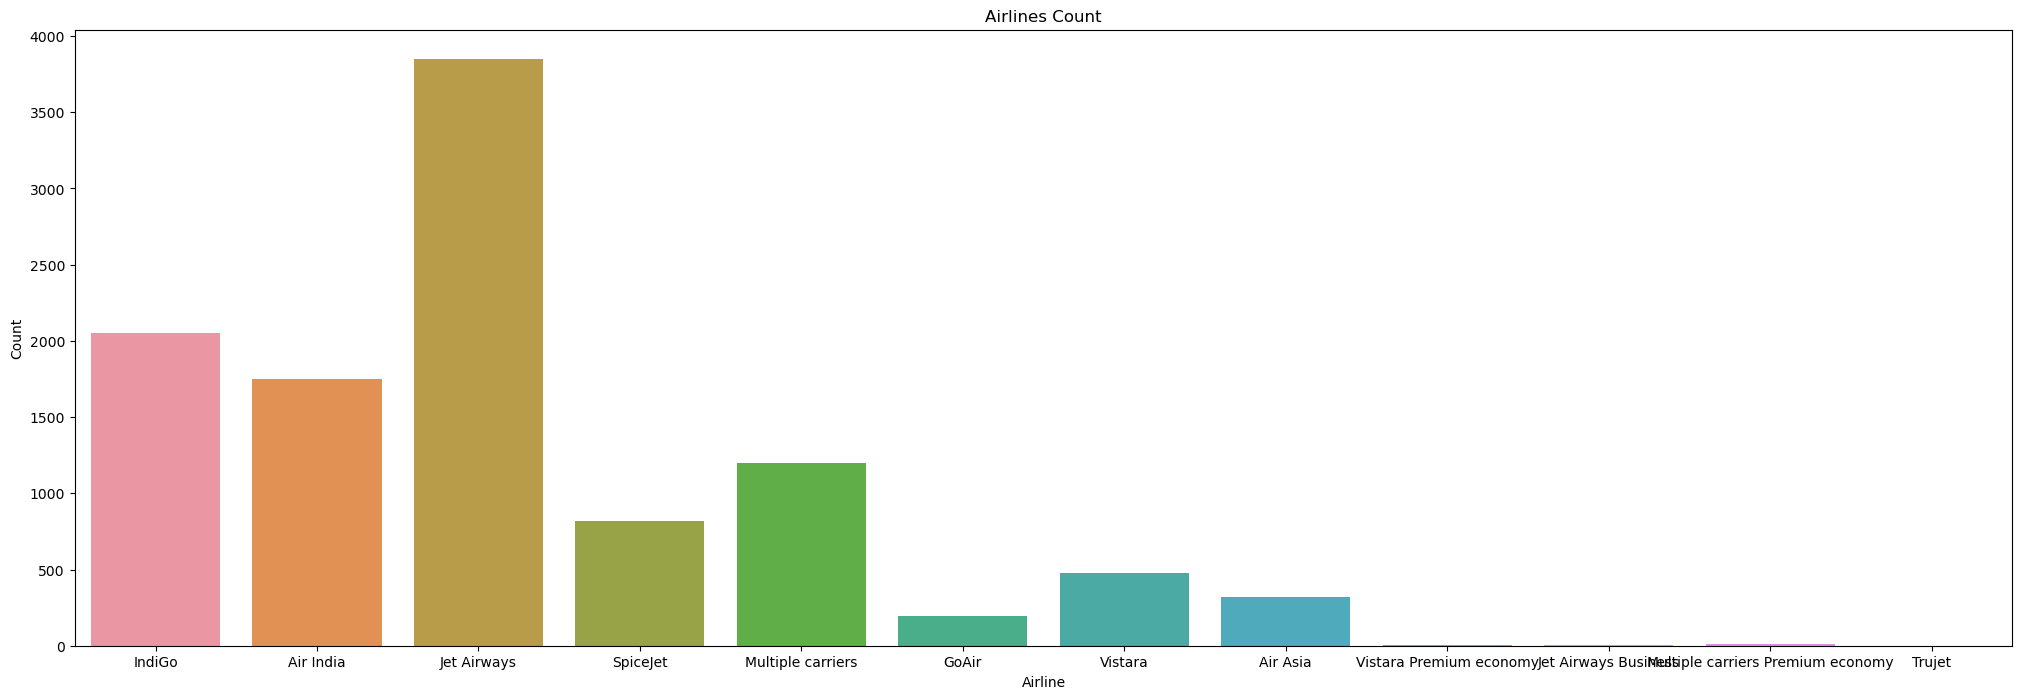

In [94]:
plt.figure(figsize=(25,8))
sns.countplot(x=data['Airline'])
plt.title("Airlines Count")
plt.xlabel("Airline")
plt.ylabel("Count")
plt.show()

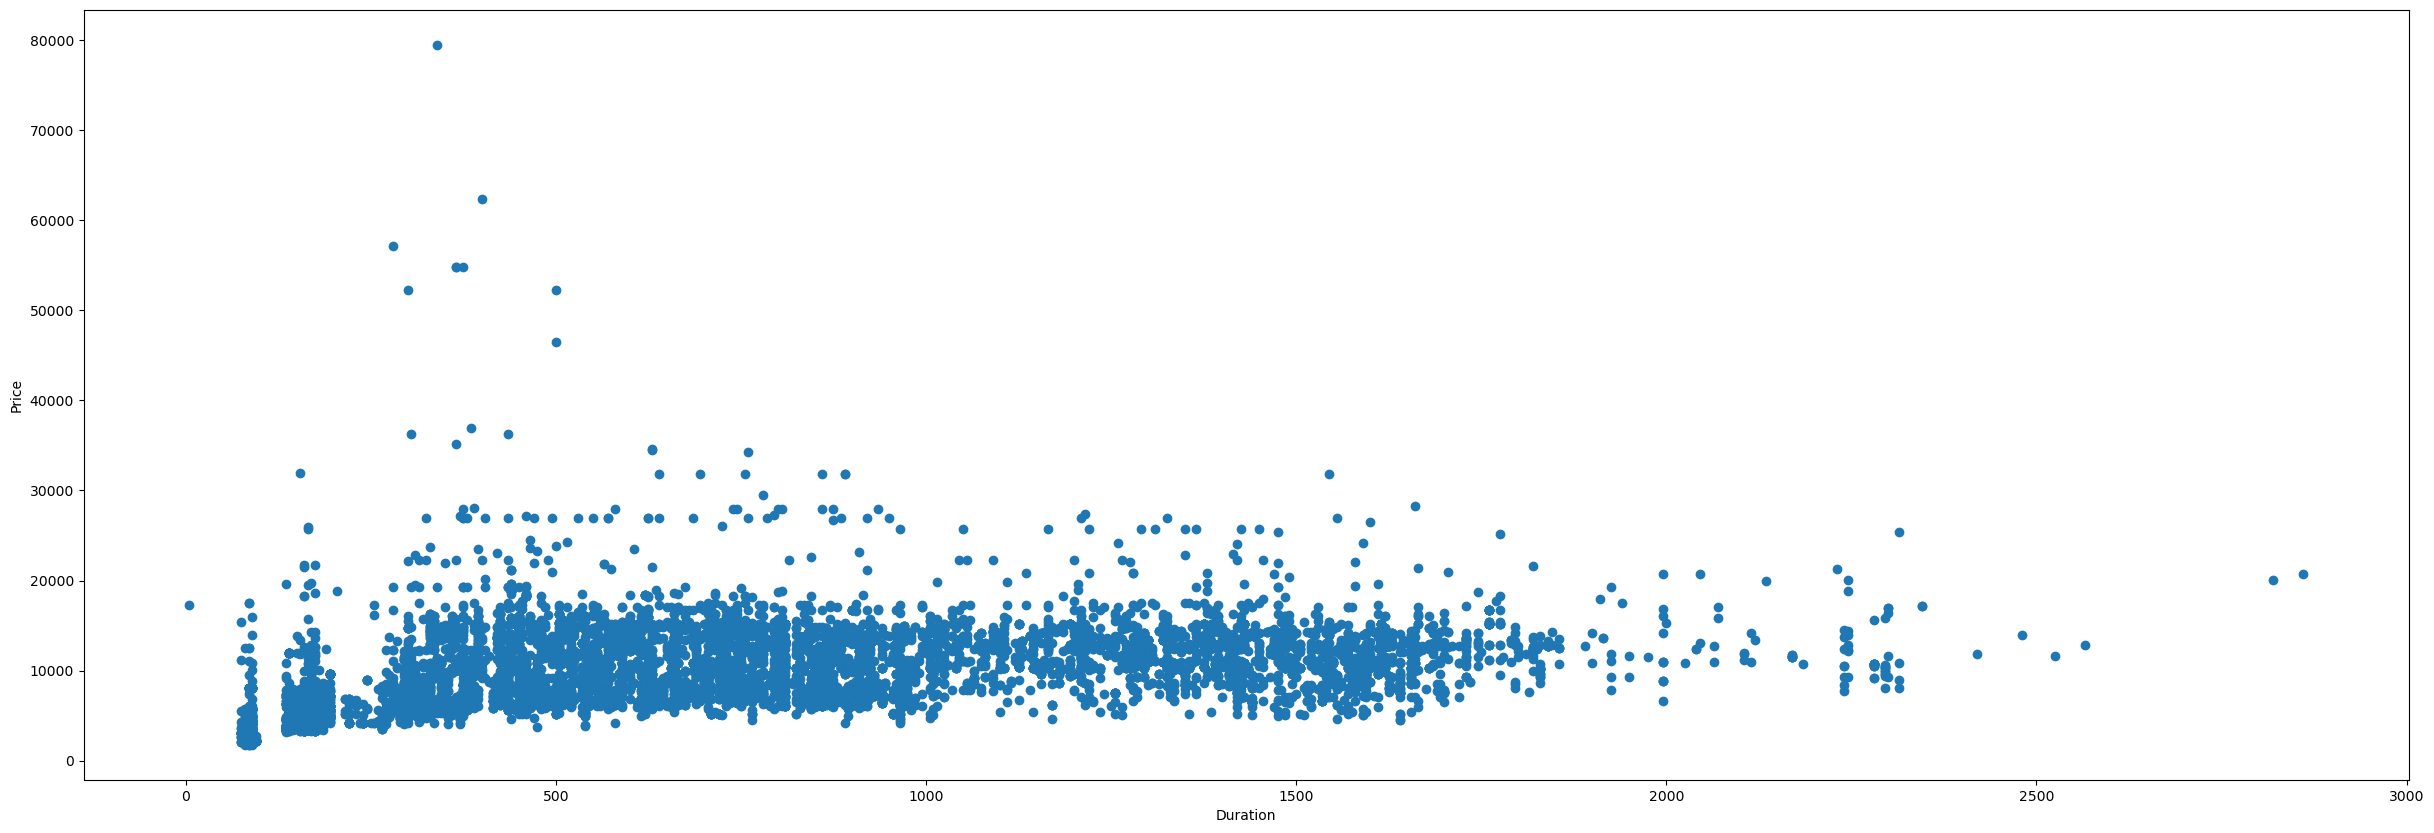

In [98]:
plt.figure(figsize=(30,10))
plt.scatter((data['Dur_h']*60+data['Dur_m']),data['Price'])
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

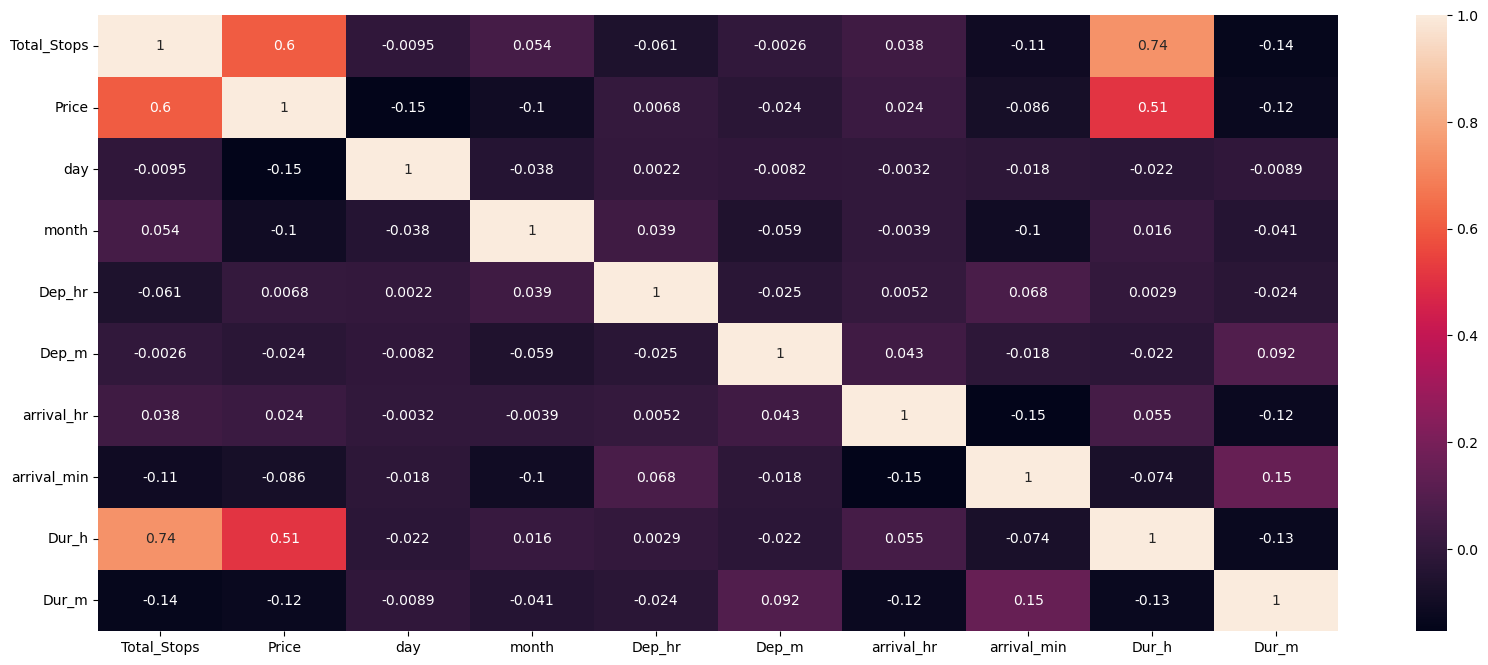

In [103]:
plt.figure(figsize=(20,8))

sns.heatmap(data.corr(),annot=True)
plt.show()

In [104]:
data=pd.get_dummies(data,drop_first=True)
data.head()

,Total_Stops,Price,day,month,Dep_hr,Dep_m,arrival_hr,arrival_min,Dur_h,Dur_m,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [105]:
X=data.drop('Price',axis=1).values
y=data['Price'].values